In [1]:
from data_utils import read_all_scores, read_all_candles, group_dates_df, get_prices_daily, create_prices_df
from portfolio_optimization import get_portfolio_weights
from submission_utils import _fix_weights, get_submission_markowitz, general_weights_fixer
import pandas as pd

In [2]:
!ls trainTimeSeries/trainTimeSeries/

TrainCandles  TrainScores


In [3]:
scores = read_all_scores("trainTimeSeries/trainTimeSeries/TrainScores")

100%|██████████| 94/94 [00:01<00:00, 81.99it/s]


In [4]:
len(scores)

94

In [5]:
candles = read_all_candles("trainTimeSeries/trainTimeSeries/TrainCandles")

100%|██████████| 96/96 [00:01<00:00, 51.39it/s]


In [6]:
len(candles)

96

In [7]:
candles["TMF"]

,close,max,min,open
date,,,,
2019-07-21 21:00:00,179.89,179.89,179.89,179.89
2019-07-21 22:00:00,179.89,179.89,179.89,179.89
2019-07-21 23:00:00,179.89,179.89,179.89,179.89
2019-07-22 00:00:00,179.89,179.89,179.89,179.89
2019-07-22 01:00:00,179.89,179.89,179.89,179.89
...,...,...,...,...
2020-06-17 19:00:00,214.05,214.05,214.05,214.05
2020-06-17 20:00:00,214.05,214.05,214.05,214.05
2020-06-17 21:00:00,214.05,214.05,214.05,214.05


In [8]:
candles = {k:v for k,v in candles.items() if k in scores}

In [9]:
len(candles)

94

In [10]:
scores.keys()

dict_keys(['GRU', 'TMF', 'THA', 'JTL', 'LWK', 'CIS', 'GGR', 'VRT', 'VVC', 'GRI', 'CBY', 'BAX', 'DIG', 'SHC', 'LWE', 'HEO', 'RAT', 'AWW', 'NYD', 'ZUJ', 'AUX', 'FFV', 'PME', 'ULT', 'DZF', 'ZAB', 'ZCD', 'USX', 'SBY', 'BFS', 'CSB', 'PHI', 'ERO', 'PEW', 'YAX', 'PPT', 'WFJ', 'FIR', 'HQU', 'TER', 'WWT', 'OXR', 'LHB', 'BOT', 'HZY', 'TXR', 'EEY', 'ERQ', 'LUG', 'NCT', 'UPP', 'BSX', 'FSK', 'ZXW', 'RWJ', 'TDD', 'YEC', 'AZG', 'HCC', 'UYZ', 'REU', 'SKN', 'PUL', 'ZTY', 'BZC', 'GFJ', 'SEH', 'ACY', 'TKT', 'UEI', 'MET', 'YFC', 'JHI', 'NSC', 'NWO', 'SRI', 'BGN', 'LEN', 'WXN', 'TRO', 'SKI', 'IDT', 'NYP', 'ULI', 'SYO', 'JNE', 'OJG', 'EOP', 'NVL', 'ZVQ', 'FNM', 'MCA', 'OOS', 'XRX'])

<AxesSubplot:>

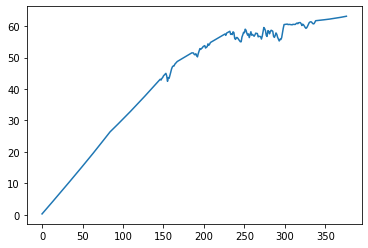

In [11]:
scores['GRU']["Ds"].plot()

In [12]:
scores["GRU"].head()

,eod_ts,Dp,Ex,Mc,Rs,Ra,Os,Cs,Rp,Rm,Dc,La,Pf,Cp,Ds,fcal_ts,lcal_ts
0,2019-01-04 22:00:00,0.000000,0.000000,0.0,10.0,8.507216,10.000000,10.0,0.0,0.0,0.0,0.0,9.938803,0.000000,0.297619,2019-01-05 00:00:00.000,2020-08-24 17:03:55.065
1,2019-01-07 22:00:00,0.055556,0.046296,0.0,10.0,8.507216,10.000000,10.0,0.0,0.0,0.0,0.0,9.219292,2.326375,0.592047,2019-01-08 00:00:00.000,2020-08-24 17:03:55.065
2,2019-01-08 22:00:00,0.055556,0.046296,0.0,10.0,8.507216,5.069444,10.0,0.0,0.0,0.0,0.0,8.694655,2.326375,0.889469,2019-01-09 00:00:00.000,2020-08-24 17:03:55.065
3,2019-01-09 22:00:00,0.055556,0.046296,0.0,10.0,8.507216,5.069444,10.0,0.0,0.0,0.0,0.0,7.377259,2.326375,1.178302,2019-01-10 00:00:00.000,2020-08-24 17:03:55.065
4,2019-01-10 22:00:00,0.031342,0.026119,0.0,10.0,5.043672,5.069444,10.0,0.0,0.0,0.0,0.0,9.219393,2.326375,1.487981,2019-01-11 00:00:00.000,2020-08-24 17:03:55.065


In [13]:
scores_dict = {k:v["Ds"].mean() for k,v in scores.items()}

In [14]:
mean_ = list(sorted(scores_dict, key=scores_dict.get, reverse=True))[:50]

In [15]:
scores_dictlast = {k:v["Ds"].iloc[-1] for k,v in scores.items()}

In [16]:
last_ = list(sorted(scores_dictlast, key=scores_dictlast.get, reverse=True))[:50]

In [17]:
scores_dictmaxdiff = {k:v["Ds"].iloc[-1] - v["Ds"].iloc[0] for k, v in scores.items()}

In [18]:
maxdiff_ = list(sorted(scores_dictmaxdiff, key=scores_dictmaxdiff.get, reverse=True))[:50]

In [19]:
elems_get = [elem for elem in mean_ if elem in last_ and elem in maxdiff_]

In [20]:
elems_get

['ZVQ',
 'THA',
 'ERQ',
 'ZTY',
 'AUX',
 'UYZ',
 'PME',
 'SYO',
 'TMF',
 'TKT',
 'LEN',
 'ZCD',
 'YEC',
 'NYP',
 'NVL',
 'ZXW',
 'HZY',
 'CBY',
 'GRI',
 'TXR',
 'IDT',
 'HEO',
 'SEH',
 'RAT',
 'CIS',
 'FIR',
 'TRO',
 'NSC',
 'UPP',
 'VVC',
 'DZF',
 'VRT',
 'ACY',
 'AZG',
 'BAX',
 'TDD',
 'TER',
 'BGN',
 'PPT',
 'SKI',
 'AWW',
 'FNM']

In [21]:
candles = {k:v for k,v in candles.items() if k in elems_get}

In [22]:
candles["TKT"].tail()

,close,max,min,open
date,,,,
2020-06-17 19:00:00,182.11,182.15,181.92,181.92
2020-06-17 20:00:00,181.94,182.31,181.89,182.12
2020-06-17 21:00:00,181.87,182.04,181.62,181.91
2020-06-17 22:00:00,182.03,182.03,181.80,181.92
2020-06-17 23:00:00,182.03,182.03,181.80,181.92


In [23]:
candles = {k: group_dates_df(v) for k,v in candles.items()}

In [24]:
candles["TMF"].tail()

,close,low,high,open
date,,,,
2020-06-13,NaN,NaN,NaN,NaN
2020-06-14,214.05,214.05,214.05,214.05
2020-06-15,214.05,214.05,214.05,214.05
2020-06-16,214.05,214.05,214.05,214.05
2020-06-17,214.05,214.05,214.05,214.05


In [25]:
prices_df = create_prices_df(candles)

100%|██████████| 42/42 [00:00<00:00, 1312.02it/s]


In [26]:
from tqdm import tqdm
def create_prices_df(dfs_dict):
    dfs = []
    for asset in tqdm(dfs_dict):
        dfs_dict[asset].columns = [f"{asset}_{col}" if col != "date" else col for col in dfs_dict[asset].columns ]
        dfs.append(dfs_dict[asset][f"{asset}_close"])
    return reduce(lambda left, right: pd.merge(left, right, how="outer", left_index=True, right_index=True), dfs)

In [27]:
[v.shape for v in candles.values()]

[(547, 4),
 (547, 4),
 (333, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (368, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (452, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4),
 (547, 4)]

In [28]:
prices_df.index

DatetimeIndex(['2018-12-19', '2018-12-20', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28',
               ...
               '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11',
               '2020-06-12', '2020-06-13', '2020-06-14', '2020-06-15',
               '2020-06-16', '2020-06-17'],
              dtype='datetime64[ns]', name='date', length=547, freq=None)

In [29]:
prices_df

,ZVQ_close,FIR_close,TMF_close,TDD_close,HEO_close,CIS_close,UYZ_close,TRO_close,YEC_close,HZY_close,...,SYO_close,SKI_close,NSC_close,LEN_close,PME_close,FNM_close,ERQ_close,AZG_close,TXR_close,RAT_close
date,,,,,,,,,,,,,,,,,,,,,
2018-12-19,531.91,121.61,NaN,116.14,125.40,123.55,187.61,125.60,152.30,151.13,...,176.92,113.86,135.83,168.31,208.72,111.40,230.67,130.83,142.04,140.28
2018-12-20,531.91,121.61,NaN,117.09,125.40,123.65,187.44,125.60,152.56,151.80,...,176.27,113.96,135.78,168.32,210.54,111.66,NaN,131.67,141.87,140.28
2018-12-21,NaN,120.94,NaN,NaN,124.83,123.84,185.59,NaN,152.58,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.62,NaN,140.28
2018-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-23,NaN,121.37,NaN,NaN,125.18,123.84,NaN,125.60,153.10,151.80,...,NaN,NaN,134.35,NaN,210.54,113.20,230.67,NaN,141.84,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-14,565.39,169.75,214.05,160.12,185.92,183.21,220.71,162.26,170.79,171.61,...,212.79,169.05,158.60,204.81,225.12,145.00,249.63,149.68,160.47,158.53
2020-06-15,570.35,169.75,214.05,161.50,185.28,181.00,220.73,160.43,168.49,171.10,...,216.21,167.39,158.27,204.60,225.12,145.03,246.47,152.68,160.47,158.53


In [30]:
prices_df.sort_index(inplace=True)

In [79]:
weights = get_portfolio_weights(prices_df, clean=True)

In [80]:
weights

OrderedDict([('ZVQ_close', 0.00752),
             ('FIR_close', 0.04282),
             ('TMF_close', 0.06913),
             ('TDD_close', 0.02987),
             ('HEO_close', 0.02435),
             ('CIS_close', 0.0934),
             ('UYZ_close', 0.02991),
             ('TRO_close', 0.04841),
             ('YEC_close', 0.0),
             ('HZY_close', 0.01399),
             ('ZTY_close', 0.00065),
             ('SEH_close', 0.0155),
             ('AWW_close', 0.06538),
             ('GRI_close', 0.02238),
             ('ACY_close', 0.0),
             ('VRT_close', 0.0262),
             ('ZXW_close', 0.01589),
             ('VVC_close', 0.00124),
             ('CBY_close', 0.00699),
             ('PPT_close', 0.02213),
             ('IDT_close', 0.00731),
             ('ZCD_close', 0.06445),
             ('AUX_close', 0.01509),
             ('DZF_close', 0.01147),
             ('BAX_close', 0.03908),
             ('UPP_close', 0.04235),
             ('BGN_close', 0.02559),
            

In [81]:
def general_weights_fixer(lista):
    lista = [round(act, 3) for act in lista]
    suma = sum(lista)
    if suma > 1:
        sobra = suma - 1
        sobra_cada = sobra / len(lista)
        for i in range(len(lista)):
            lista[i] -= sobra_cada
    elif suma < 1:
        falta = 1 - suma
        falta_cada = falta / len(lista)
        for i in range(len(lista)):
            lista[i] += falta_cada
    return lista

In [82]:
import numpy as np
def general_weights_fixer(lista):
    lista = [round(act, 3) for act in lista]
    suma = sum(lista)
    if suma > 1:
        sobra = suma - 1
        idx = np.argmax(lista)
        lista[idx] -= sobra
    elif suma < 1:
        falta = 1 - suma
        idx = np.argmax(lista)
        lista[idx] += falta
    return lista

In [83]:
def even_more_general(lista):
    lista = [round(w, 3) for w in lista]
    suma = sum(lista)
    lista = [w/suma for w in lista]
    return lista

In [84]:
ws = general_weights_fixer(weights.values())

In [85]:
sum(ws)

1.0

In [86]:
ws

[0.008,
 0.043,
 0.069,
 0.03,
 0.024,
 0.09599999999999956,
 0.03,
 0.048,
 0.0,
 0.014,
 0.001,
 0.016,
 0.065,
 0.022,
 0.0,
 0.026,
 0.016,
 0.001,
 0.007,
 0.022,
 0.007,
 0.064,
 0.015,
 0.011,
 0.039,
 0.042,
 0.026,
 0.038,
 0.031,
 0.049,
 0.0,
 0.0,
 0.026,
 0.021,
 0.008,
 0.006,
 0.004,
 0.042,
 0.002,
 0.014,
 0.017,
 0.0]

In [89]:
sum(weights.values())

1.0

In [88]:
weights = {k:v for k, v in zip(weights.keys(), ws)}

In [43]:
weights = _fix_weights(weights)

In [90]:
sum(weights.values()) == 1

True

In [91]:
def get_submission_markowitz(weights, assets):
    #weights = _fix_weights(weights)
    subm_plantilla = pd.read_csv("./submission/submission.csv")
    date = subm_plantilla["eod_ts"]
    cols = {
        f"allo_{asset.replace('_close', '')}": [weights[f"{asset}"]] * len(date) for asset in assets
    }
    return pd.DataFrame({**cols}, index=date)

In [92]:
submission = get_submission_markowitz(weights, weights.keys())

In [93]:
submission

,allo_ZVQ,allo_FIR,allo_TMF,allo_TDD,allo_HEO,allo_CIS,allo_UYZ,allo_TRO,allo_YEC,allo_HZY,...,allo_SYO,allo_SKI,allo_NSC,allo_LEN,allo_PME,allo_FNM,allo_ERQ,allo_AZG,allo_TXR,allo_RAT
eod_ts,,,,,,,,,,,,,,,,,,,,,
2020-08-18 00:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
2020-08-18 01:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
2020-08-18 02:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
2020-08-18 03:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
2020-08-18 04:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 17:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
2020-12-24 18:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0
2020-12-24 19:00:00,0.008,0.043,0.069,0.03,0.024,0.096,0.03,0.048,0.0,0.014,...,0.026,0.021,0.008,0.006,0.004,0.042,0.002,0.014,0.017,0.0


In [94]:
submission.sum(axis=1)[0]

1.0

In [95]:
all([w >= 0 for w in weights.values()])

True

In [96]:
[w for w in weights.values() if w < 0]

[]

In [97]:
submission.to_csv("submission_1202.csv", index=True, header=True)

In [48]:
sum(weights.values())

1.0

In [50]:
sum([0.231907,0.004382,0.030897,0.218507,0.075967,0.136204,0.1366,0.007761, 0.085841, 0.034575, 0.037359])

1.0